## Lab 2 : Clustering
### Darian Yang

Tasks:
1. Load the data and explore it.
2. Perform k-means clustering. Determine the optimal number of clusters using e.g. elbow method.
3. Perform clustering with different clustering methods implemented in Scikit Learn.
4. Now, try clustering with another distance metric (e.g. Cosine, Jaccard, etc). Hint: Think whether the default distance metric is appropriate for your data or not.
5. Visualize results using the dimensionality reduction (UMAP or tSNE) technique with respect to the cluster labels.
6. Compare clustering results. Try to rationalize observed commonalities or differences with respect to clustering methods and distance metrics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading and Exploring the Dataset

In [2]:
df = pd.read_csv("Lab2_clustering_dataset.csv")
df

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,ZSRJHGJCRGZJNH-UHFFFAOYSA-N,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
965,ZTCGLAMYEAGAAN-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1
966,ZVWRFVCNQOECJS-UHFFFAOYSA-N,1,0,1,1,1,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
967,ZXAGZULZCKUUKQ-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,0,...,1,1,1,1,1,0,0,1,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


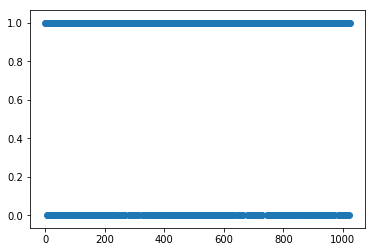

In [4]:
# first row
plt.scatter(range(0, len(df.iloc[0,1:])), df.iloc[0,1:])
plt.show()

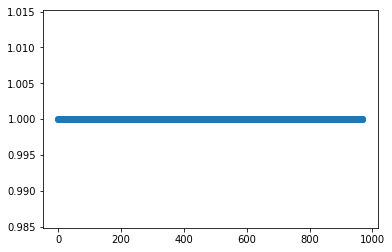

In [5]:
# first column
plt.scatter(range(0, len(df.iloc[:,1])), df.iloc[:,1])
plt.show()

Seems like the data is all binary, I need to transform it in some way to better analyze it. My first thoughts are to either standardize it (Z-score) or to maybe run PCA and then analyze the PCA value per column. I'll try standardizing for now.

Scikit-learn has a few nice scaling functions, lets use standard scaling, which scales by calculating the Z-score (z = (x - $\mu$) / $\sigma$).

In [6]:
# first drop the ID column
df = df.drop("ID",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1024 entries, D_0 to D_1023
dtypes: int64(1024)
memory usage: 7.6 MB


In [9]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(df)
#df_scaled = scaler.transform(df)
#df_scaled
# testing what would happen is I didn't standardize the binary input
df_scaled = df
df

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,1,1
2,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,1
3,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,1
965,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,0,0,1,1,1
966,1,0,1,1,1,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
967,1,1,1,1,1,1,1,0,0,0,...,1,1,1,1,1,0,0,1,1,1


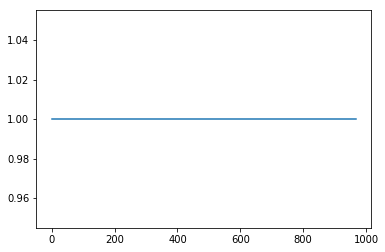

In [11]:
plt.plot(df_scaled.iloc[:,0])

## K-means Clustering

In [12]:
from sklearn.cluster import KMeans

Have to use the correct amount of clusters, can do this using the elbow method.

In [13]:
# get the inertia values for a range of k values
inertia = [KMeans(n_clusters=k).fit(df_scaled).inertia_ for k in range(1, 21)]
inertia

[160795.43653250777,
 132780.33626683525,
 114354.2839105879,
 98016.5541298567,
 88100.19735734035,
 79216.16348850526,
 71627.29467731652,
 63959.35091314416,
 58362.30772364835,
 54898.93295516547,
 52499.03347533028,
 50066.73636933489,
 48387.616235371126,
 47475.59044172036,
 45773.129791361906,
 44933.14648158608,
 44143.75269076097,
 42999.77968694245,
 42657.87232585784,
 41906.007479791326]

Text(0,0.5,'inertia')

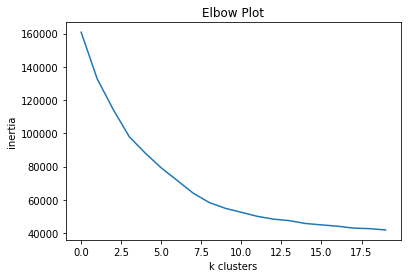

In [14]:
plt.plot(inertia)
plt.title("Elbow Plot")
plt.xlabel("k clusters")
plt.ylabel("inertia")

From the elbow plot, maybe k = 8 would be appropriate for this data.

In [15]:
km8 = KMeans(n_clusters=8).fit(df_scaled)

It's not in the order of the task list, but I want to see the clustering results on a t-SNE or UMAP based plot.

In [16]:
from sklearn import manifold

In [17]:
tsne = manifold.TSNE(perplexity=40, n_components=2)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne.shape

(969, 2)

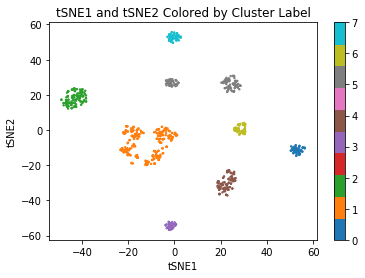

In [18]:
plt.scatter(df_tsne[:,0], df_tsne[:,1], c=km8.labels_, s=2, cmap="tab10")
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("tSNE1 and tSNE2 Colored by Cluster Label")
plt.colorbar()

As expected, the clusters look pretty reasonable with km = 8.

## Time to try other sklearn clustering methods

In [31]:
from sklearn import cluster, mixture

In [32]:
# from k-means
n_clusters = 8

In [34]:
# spectral clustering
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver="arpack", affinity="rbf").fit(df_scaled)

In [35]:
# gmm clustering
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type="full").fit(df_scaled)

In [36]:
# DBSCAN
dbscan = cluster.DBSCAN().fit(df_scaled)

In [37]:
# agglomerative with ward linkage
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage="ward").fit(df_scaled)

In [38]:
# affinity propagation
ap = cluster.AffinityPropagation().fit(df_scaled)

Okay, now let's visualize the results from each using t-sne plots.

In [39]:
def tsne_plot(df, clusters, ax=None, title="tSNE plot"):
    """
    Run and plot t-sne with cluster labels.
    """
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()
    
    # run t-sne
    tsne = manifold.TSNE(perplexity=40, n_components=2)
    df_tsne = tsne.fit_transform(df)
    
    # get cluster labels
    if hasattr(clusters, "labels_"):
        labels = clusters.labels_.astype(int)
    else:
        labels = clusters.predict(df)
    
    # plot the figure
    plot = ax.scatter(df_tsne[:,0], df_tsne[:,1], c=labels, s=2, cmap="nipy_spectral")
    ax.set_xlabel("tSNE1")
    ax.set_ylabel("tSNE2")
    ax.set_title(title)
    fig.colorbar(plot, ax=ax)

Let's test my tsne_plot function to make sure it works.

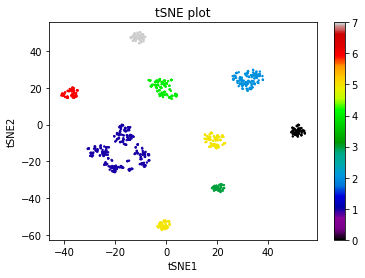

In [40]:
tsne_plot(df_scaled, km8)
plt.show()

Okay, looks good, now lets plot everything.

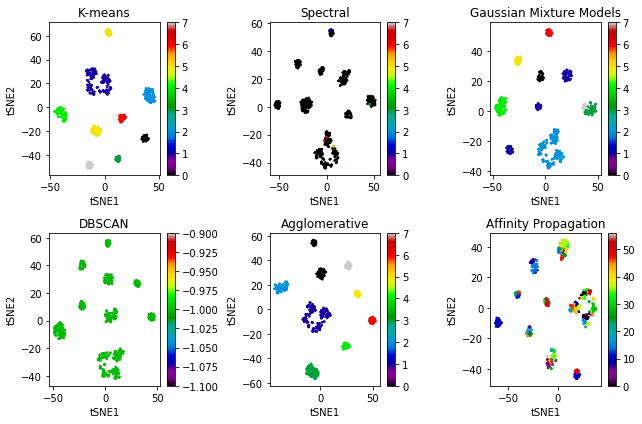

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9,6))
tsne_plot(df_scaled, km8, ax=ax[0,0], title="K-means")
tsne_plot(df_scaled, spectral, ax=ax[0,1], title="Spectral")
tsne_plot(df_scaled, gmm, ax=ax[0,2], title="Gaussian Mixture Models")
tsne_plot(df_scaled, dbscan, ax=ax[1,0], title="DBSCAN")
tsne_plot(df_scaled, ward, ax=ax[1,1], title="Agglomerative")
tsne_plot(df_scaled, ap, ax=ax[1,2], title="Affinity Propagation")
plt.tight_layout()
plt.show()

So, the results are in, looks like some algorithms performed pretty poorly (such as spectral clustering), while others were pretty discriminating (agglomerative). And DBSCAN seems like I may not have done something properly in terms of the label output (all of which seems to be labeled as -1). Maybe the default settings didn't work well for this dataset.

## Next, need to try clustering using different distance metrics

My first thought is to try this using k-means, but upon a quick google search, it seems like this isn't readily implemented in sklearn (although the custom callable for init in k-means could be an avenue probably). Perhaps it will be best to just implement my own k-means function with a custom distance matrix.

I did this in a separate python file for simplicity, I will attach it to the submission.

In [42]:
from kmeans import KMeans

Now, first I should test my standard euclidean based implementation.

In [44]:
my_km = KMeans(8)
my_km.fit(df_scaled.values)

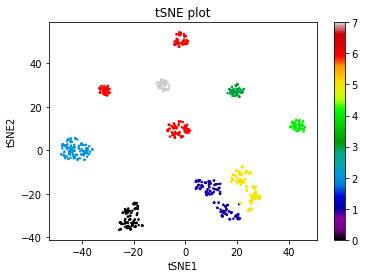

In [45]:
tsne_plot(df_scaled, my_km)
plt.show()

Not bad! Or at least as good as the sklearn implementation! Okay, so my implementation seems to be working for this dataset at least, now to try with my other distance matrix options that I built in.

In [47]:
# run my k-means with all of my distance options
df_scaled = df_scaled.values
jac_km = KMeans(8, distance_metric="jaccard")
jac_km.fit(df_scaled)

cos_km = KMeans(8, distance_metric="cosine")
cos_km.fit(df_scaled)

man_km = KMeans(8, distance_metric="manhattan")
man_km.fit(df_scaled)

ham_km = KMeans(8, distance_metric="hamming")
ham_km.fit(df_scaled)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


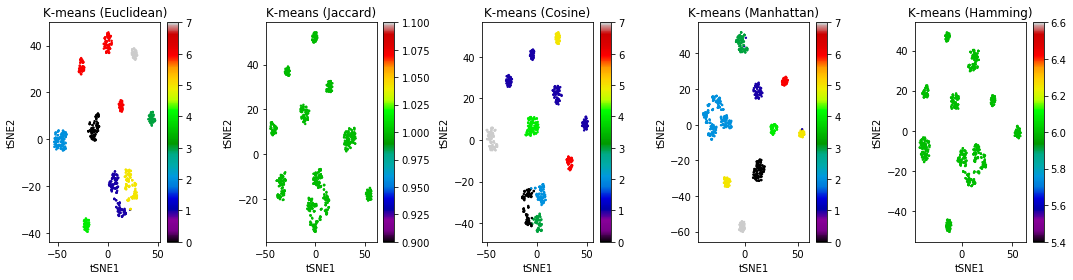

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,4))
tsne_plot(df_scaled, my_km, ax=ax[0], title="K-means (Euclidean)")
tsne_plot(df_scaled, jac_km, ax=ax[1], title="K-means (Jaccard)")
tsne_plot(df_scaled, cos_km, ax=ax[2], title="K-means (Cosine)")
tsne_plot(df_scaled, man_km, ax=ax[3], title="K-means (Manhattan)")
tsne_plot(df_scaled, ham_km, ax=ax[4], title="K-means (Hamming)")
plt.tight_layout()
plt.show()

So overall the other distance metrics seem to be working, but Jaccard and Hamming are not as robust as Euclidean and Cosine. Note that I tried Manhattan, and it worked on a test dataset but got some error upon trying to implement it here, which is a shame cause it worked well on the test dataset. I may try to debug it more at some point.

## Finally, need to compare all of clustering results so far

Let's just plot all the clustering options that I have done so far and then discuss.

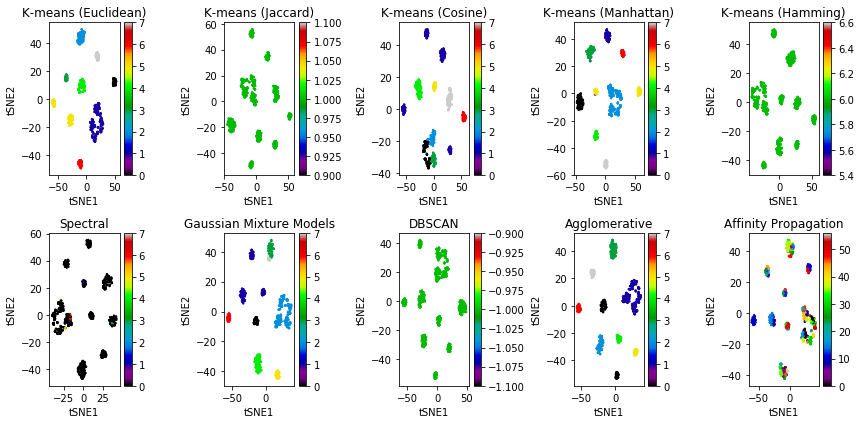

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12,6))
tsne_plot(df_scaled, km8, ax=ax[0,0], title="K-means (Euclidean)")
tsne_plot(df_scaled, jac_km, ax=ax[0,1], title="K-means (Jaccard)")
tsne_plot(df_scaled, cos_km, ax=ax[0,2], title="K-means (Cosine)")
tsne_plot(df_scaled, man_km, ax=ax[0,3], title="K-means (Manhattan)")
tsne_plot(df_scaled, ham_km, ax=ax[0,4], title="K-means (Hamming)")
tsne_plot(df_scaled, spectral, ax=ax[1,0], title="Spectral")
tsne_plot(df_scaled, gmm, ax=ax[1,1], title="Gaussian Mixture Models")
tsne_plot(df_scaled, dbscan, ax=ax[1,2], title="DBSCAN")
tsne_plot(df_scaled, ward, ax=ax[1,3], title="Agglomerative")
tsne_plot(df_scaled, ap, ax=ax[1,4], title="Affinity Propagation")
plt.tight_layout()
plt.show()

### Okay! All done with t-sne plots. I'll summarize the findings below:
* Overall, traditional Euclidean based k-means seems to be fairly effective.
* When the distance metrics for k-means are changed, using cosine similarity for the distance matrix also seems to work well. 
    * Perhaps this is because of the sparsity of the initial dataset?
    * Conversely, using Jaccard or Hamming distances lead to less robust cluster separations. 
        * This was seen both with my simple test dataset in the external python kmeans.py script and with the current dataset being considered.
        * I didn't expect Jaccard or Hamming to perform super effectively.
            * With Jaccard distances, I think the initial dataset may need to be more diverse, this was all binary.
            * With Hamming distances, it seems like this is best suited for strings, so not really the best bet here, but maybe is each datapoint was something with multiple bits (e.g. 0100101)
* As for the clustering approaches outside of k-means:
    * GMM and agglomerative were best. On one level, these both had the advantage of being able to use n_clusters = 8.
    * GMMs are also very similar to k-means, so I expected it to perform similarily.
    * While spectral clustering was in the same boat (n_clusters = 8), the result was not very discriminating.
    * Density based clustering also didn't perform very well.
    * Affinity propagation could separate some clusters but was overall not very effective.
* I think this dataset being very similar and conglomerated around 0-1 (thus not having alot of variance and spread) was what lead to low performance for spectral, dbscan, and affinity propagation.
   